## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Chargement et exploration des données 

In [3]:
file_path = '../Dataset/bronze/sensors_C_20250101_20260108.csv'
df = pd.read_csv(file_path)
df.head()

,value,sensor,ts
0,0.065145,oxygen_f1,2024-12-12 23:59:00
1,11.187500,temperature_f1,2024-12-12 23:59:00
2,0.437338,oxygen_f2,2024-12-12 23:59:00
3,19.146185,ammonium_f2,2024-12-12 23:59:00
4,7.534071,ammonium_f1,2024-12-12 23:59:00


**QUESTION** À quoi correspondent les capteur 'f1' et 'f2' à chaque fois ? 

### Inspection initiale des données
- Structure du DataFrame
- Nombre de capteurs
- Période temporelle couverte
- Valeurs manquantes et valeurs aberrantes

In [4]:
print('Shape:', df.shape)
df.info()

display(df.head())

#Mettre la colonne 'ts' en datetime pour faciliter les études après
df['ts'] = pd.to_datetime(df['ts'])

# Nombre de capteurs uniques
print('Nombre de capteurs uniques:', df['sensor'].nunique())
print('Liste des capteurs:', df['sensor'].unique())

# Période temporelle couverte
print('Min date:', df['ts'].min())
print('Max date:', df['ts'].max())

# Valeurs manquantes
print('Valeurs manquantes par colonne:')
display(df.isnull().sum())

# Valeurs aberrantes (exemple: valeurs négatives si non attendues)
if df['value'].min() < 0:
    print('Attention: valeurs négatives détectées dans la colonne value')

Shape: (7701070, 3)
<class 'pandas.DataFrame'>
RangeIndex: 7701070 entries, 0 to 7701069
Data columns (total 3 columns):
 #   Column  Dtype  
---  ------  -----  
 0   value   float64
 1   sensor  str    
 2   ts      str    
dtypes: float64(1), str(2)
memory usage: 176.3 MB


,value,sensor,ts
0,0.065145,oxygen_f1,2024-12-12 23:59:00
1,11.187500,temperature_f1,2024-12-12 23:59:00
2,0.437338,oxygen_f2,2024-12-12 23:59:00
3,19.146185,ammonium_f2,2024-12-12 23:59:00
4,7.534071,ammonium_f1,2024-12-12 23:59:00


Nombre de capteurs uniques: 25
Liste des capteurs: <StringArray>
[           'oxygen_f1',       'temperature_f1',            'oxygen_f2',
          'ammonium_f2',          'ammonium_f1',           'nitrate_f2',
           'nitrate_f1',       'temperature_f2',             'redox_f1',
             'redox_f2',              'mlss_f1',              'mlss_f2',
       'entry_debit_f2',        'exit_debit_f1',        'exit_debit_f2',
       'entry_debit_f1',          'entry_debit', 'retour_surpresseur_5',
 'retour_surpresseur_3', 'retour_surpresseur_1',      'retour_vanne_12',
      'retour_vanne_54',      'retour_vanne_25', 'retour_surpresseur_2',
 'retour_surpresseur_4']
Length: 25, dtype: str
Min date: 2024-12-12 23:59:00
Max date: 2026-01-08 10:14:00
Valeurs manquantes par colonne:


value     0
sensor    0
ts        0
dtype: int64

Attention: valeurs négatives détectées dans la colonne value


### Regroupement des données par capteur
Nous allons regrouper les données par capteur pour faciliter l'analyse individuelle de chaque série de mesures.

In [5]:
# Regroupement par capteur et calcul de statistiques descriptives
sensor_groups = df.groupby('sensor')
describe_by_sensor = sensor_groups['value'].describe()
display(describe_by_sensor)

# Exemple d'accès à un groupe particulier
display(sensor_groups.get_group('oxygen_f1').head())

,count,mean,std,min,25%,50%,75%,max
sensor,,,,,,,,
ammonium_f1,560431.0,5.171233,4.921329,0.000000e+00,1.572060,4.316642,7.618134,1370.071777
ammonium_f2,560431.0,8.304147,8.928708,1.400000e-43,1.649547,5.365809,12.536170,73.779808
entry_debit,371441.0,838.857812,341.257646,4.837494e+00,612.000000,747.450000,936.225000,1658.137000
entry_debit_f1,371444.0,408.234639,157.528010,1.006250e+01,303.562500,364.875000,454.500000,792.375000
entry_debit_f2,371444.0,409.784301,158.061548,1.081250e+01,304.750000,366.250000,456.625000,796.187500
exit_debit_f1,371444.0,420.929119,199.075853,1.423126e+01,287.581200,366.162500,494.243800,1100.000000
exit_debit_f2,371444.0,438.740027,207.361749,9.350006e+00,299.956200,388.437500,524.631300,1100.000000
mlss_f1,112084.0,3.560771,0.840727,0.000000e+00,2.985886,3.393473,4.194033,15.439375
mlss_f2,112084.0,3.674446,0.599212,0.000000e+00,3.200215,3.503851,4.113305,5.786873


,value,sensor,ts
0,0.065145,oxygen_f1,2024-12-12 23:59:00
20,0.064992,oxygen_f1,2024-12-13 00:00:00
26,0.064939,oxygen_f1,2024-12-13 00:01:00
38,0.064726,oxygen_f1,2024-12-13 00:02:00
44,0.064541,oxygen_f1,2024-12-13 00:03:00


**QUESTION** Quels sont les unités pour chacun de nos capteurs ? 

**QUESTION** Est ce que c'est un bug les valeurs négatives ? 

### Visualisation temporelle des capteurs ammonium, nitrate et oxygène

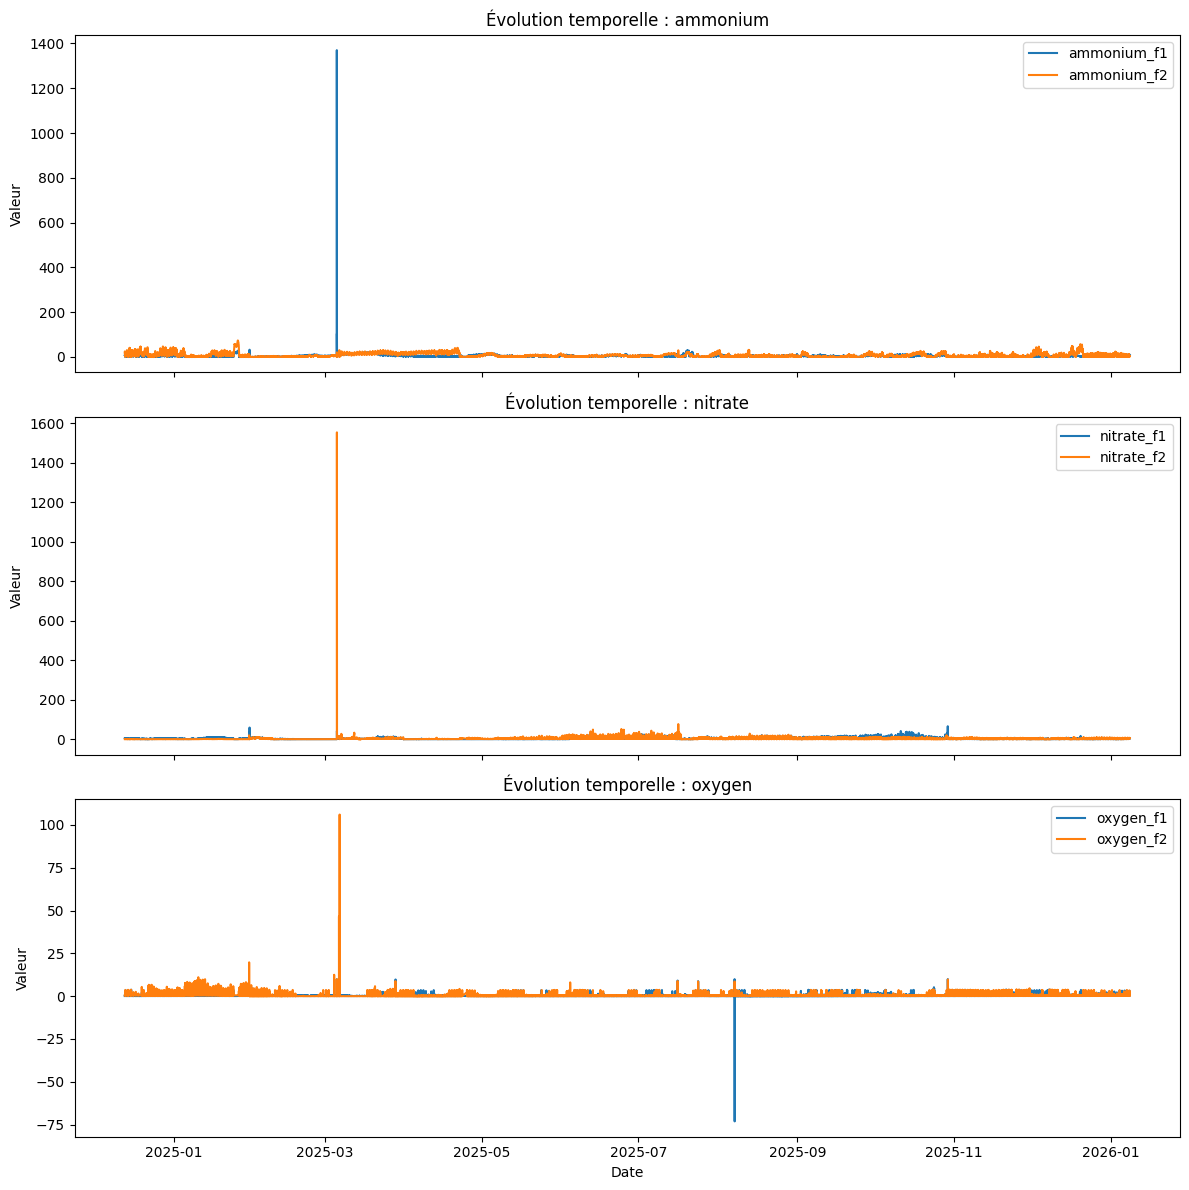

In [6]:
mesures = ['ammonium', 'nitrate', 'oxygen']
fig, axes = plt.subplots(len(mesures), 1, figsize=(12, 12), sharex=True)

for i, mesure in enumerate(mesures):
    for f in ['f1', 'f2']:
        sensor_name = f'{mesure}_{f}'
        data = df[df['sensor'] == sensor_name]
        axes[i].plot(data['ts'], data['value'], label=sensor_name)
    axes[i].set_title(f"Évolution temporelle : {mesure}")
    axes[i].set_ylabel('Valeur')
    axes[i].legend()

axes[-1].set_xlabel('Date')
plt.tight_layout()
plt.show()

### Visualisation individuelle et standardisation des capteurs
Pour une meilleure lisibilité, on affiche chaque capteur séparément et on standardise les valeurs (centrées réduites : moyenne 0, écart-type 1). Cela permet de comparer les dynamiques sans être gêné par les pics ou les différences d’échelle.

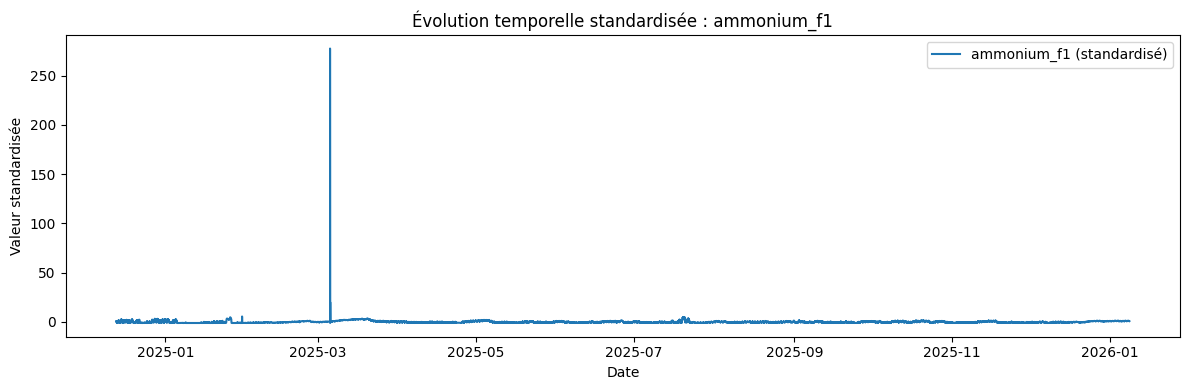

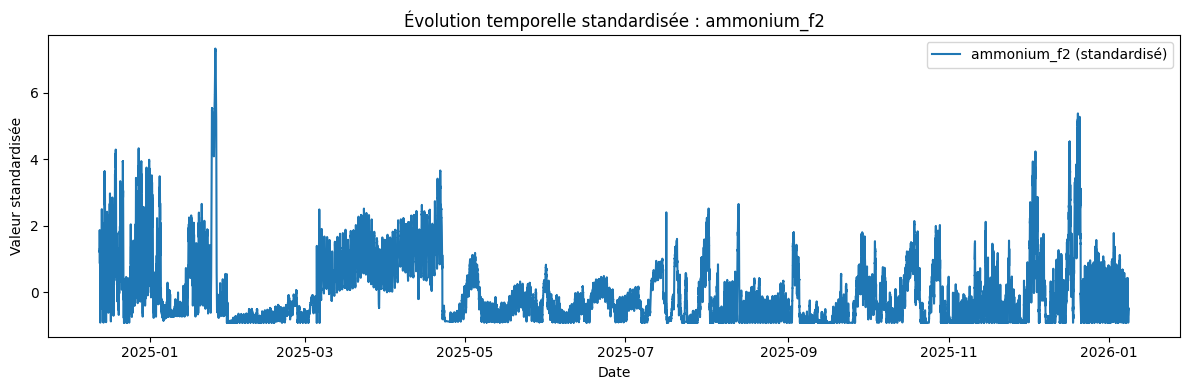

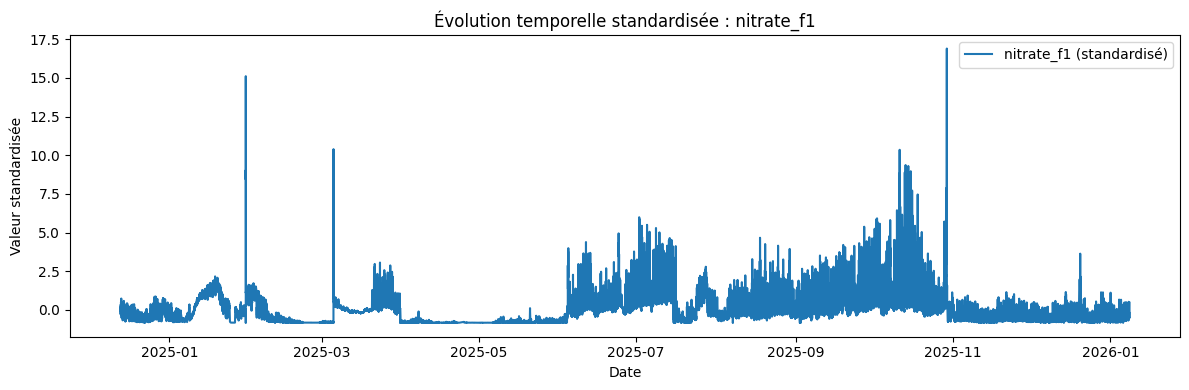

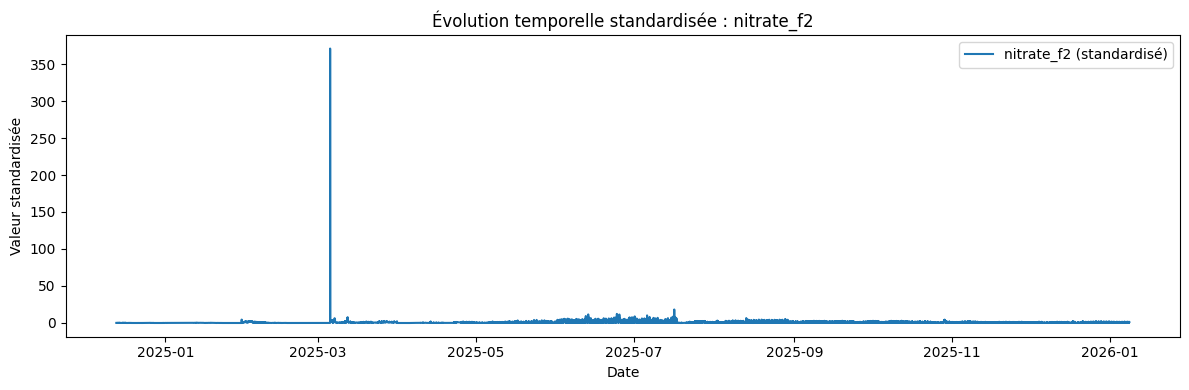

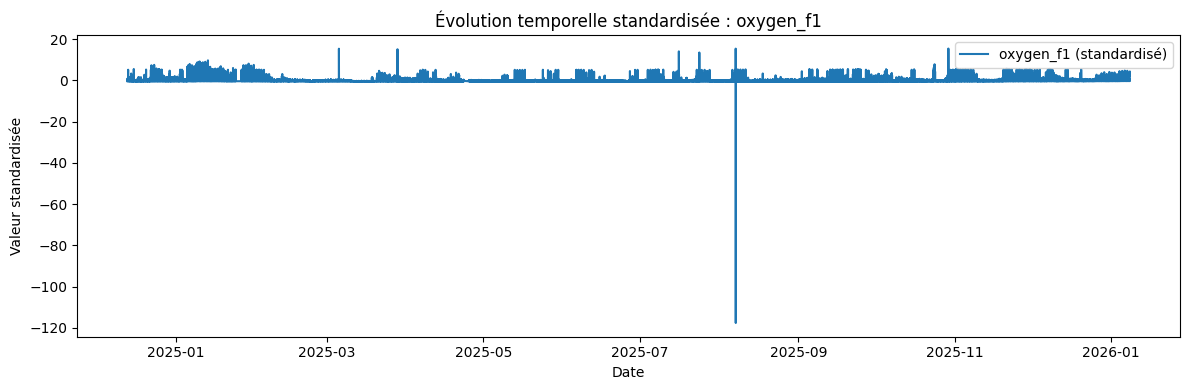

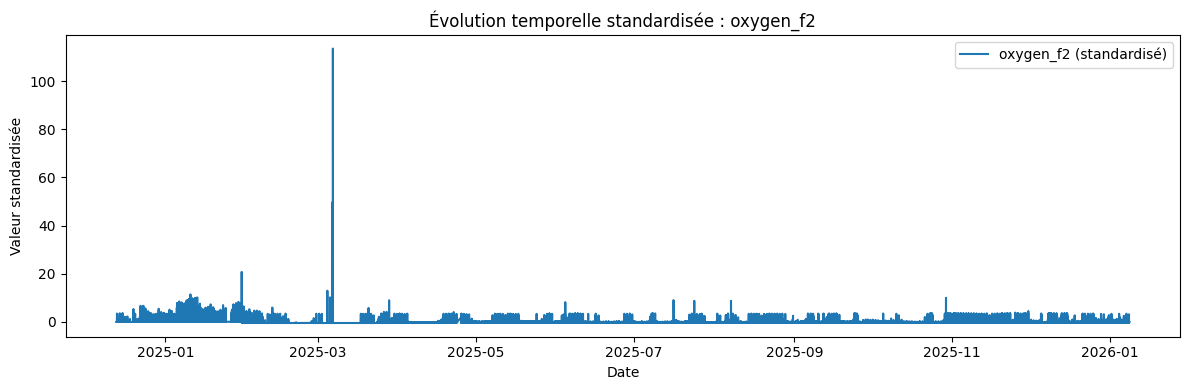

In [7]:
scaler = StandardScaler()

for mesure in mesures:
    for f in ['f1', 'f2']:
        sensor_name = f'{mesure}_{f}'
        if sensor_name in df['sensor'].unique():
            data = df[df['sensor'] == sensor_name].copy()
            # Standardisation
            data['value_std'] = scaler.fit_transform(data[['value']])
            plt.figure(figsize=(12, 4))
            plt.plot(data['ts'], data['value_std'], label=f'{sensor_name} (standardisé)')
            plt.title(f"Évolution temporelle standardisée : {sensor_name}")
            plt.xlabel('Date')
            plt.ylabel('Valeur standardisée')
            plt.legend()
            plt.tight_layout()
            plt.show()